In [1]:
!TZ=US/Eastern date

Tue Jun 24 11:57:19 EDT 2025


In [2]:
!pwd
!echo $CONDA_PREFIX
!python -V

/gpfs/gibbs/pi/ycga/mane/hl796/projects/eddy/asgpr/maybridge/D3
/home/hl796/.conda/envs/eddy
Python 3.7.12


In [3]:
import os
PD = os.environ['GIBBS']

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
INPUT_FILE1 = PD+'/data/Maybridge/Maybridge_HitDiscover.smiles.unique.v2.csv'
INPUT_FILE2 = 'maybridge.predictions.by.D3.models.all.batch'

OUTPUT_FILE1 = 'maybridge.predictions.by.D3.models.all.csv'
OUTPUT_FILE2 = 'maybridge.predictions.by.D3.models.all.mean.csv'
OUTPUT_FILE3 = 'maybridge.predictions.by.D3.models.all.mean.hist.png'

In [5]:
metadata = pd.read_csv(INPUT_FILE1, index_col=0)
metadata

,Code,SMILES
0,AC10018,FC1=CC=C(C=C1)C(C2=CC=C(F)C=C2)N3CCNCC3
1,AC12157,NC1=NC(N=CN2)=C2C(SC)=N1
2,AC13917,CN(C)CC1=CNC2=C1C=C(C=C2)OCC3=CC=CC=C3
3,AC27191,O=C(O)C1=CC=C(Br)O1
4,AC29806,O=C(O)C(N)CC1=CNC2=C1C=C(Br)C=C2
...,...,...
51770,S14814,O=[N+]([O-])C1=C(O/N=C(C)/OCC)C=CC([N+]([O-])=...
51771,S14839,O=C(N1OC2=CC=C([N+]([O-])=O)C([N+]([O-])=O)=C2...
51772,S14896,O=[N+]([O-])C1=CC=C2N=C(C3=CC=CC=C3)C(C4=CC=CC...
51773,SPB05721,CC(N1)=C(C(OCC)=O)C(/C=C/C2=CC=CC=C2)C(C(OCC)=...


In [6]:
!ls *.csv | wc

    128     128    6546


In [7]:
pred = []
for i in range(128):
    #if i == 6: continue
    pred.append(pd.read_csv(INPUT_FILE2+str(i)+'.csv'))

In [8]:
len(pred), set([x.shape for x in pred])

(128, {(248, 501), (400, 501)})

In [9]:
pred = pd.concat(pred, axis=0).reset_index(drop=True)
pred

,Ligand,CNN_AAC-R0F0,CNN_AAC-R0F1,CNN_AAC-R0F2,CNN_AAC-R0F3,CNN_AAC-R0F4,CNN_CNN-R0F0,CNN_CNN-R0F1,CNN_CNN-R0F2,CNN_CNN-R0F3,...,Morgan_CNN-R9F0,Morgan_CNN-R9F1,Morgan_CNN-R9F2,Morgan_CNN-R9F3,Morgan_CNN-R9F4,Transformer_CNN-R9F0,Transformer_CNN-R9F1,Transformer_CNN-R9F2,Transformer_CNN-R9F3,Transformer_CNN-R9F4
0,AC10018,-12.705193,-13.934161,-16.687239,-14.547069,-14.948190,-11.232117,-13.300038,-11.069161,-15.054385,...,-16.077753,-16.332762,-17.389471,-18.033325,-14.498981,-13.174500,-12.080354,-15.400160,-15.701757,-13.839155
1,AC12157,-10.029679,-12.205451,-13.219324,-12.002553,-13.368243,-9.955366,-9.241985,-10.978684,-13.025497,...,-10.503141,-11.331825,-10.344480,-9.496750,-7.301167,-13.174495,-12.080254,-15.400160,-15.701764,-13.839128
2,AC13917,-12.573600,-14.220737,-16.211716,-14.150283,-15.535786,-15.657557,-14.036637,-16.119770,-14.003067,...,-10.935285,-14.064751,-13.673495,-15.333249,-12.723589,-13.174509,-12.080284,-15.400167,-15.701744,-13.839137
3,AC27191,-10.455226,-12.141209,-12.780197,-13.477452,-13.047282,-8.976560,-8.742910,-8.969281,-9.456155,...,-9.902355,-9.918180,-11.374674,-9.038249,-9.862816,-13.174507,-12.080269,-15.400156,-15.701756,-13.839133
4,AC29806,-11.888058,-14.373402,-15.102141,-14.621945,-15.381507,-12.712382,-13.695840,-14.067121,-11.760886,...,-9.354058,-12.400393,-9.571957,-11.134932,-9.771229,-13.174498,-12.080256,-15.400162,-15.701769,-13.839147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51043,S14814,-11.230963,-12.088511,-13.239575,-14.543775,-13.518333,-9.813714,-10.636721,-9.052874,-10.202888,...,-13.731220,-13.181211,-13.927980,-15.141054,-12.322038,-13.174500,-12.080352,-15.400171,-15.701802,-13.839133
51044,S14839,-13.118680,-13.464215,-14.861210,-14.053765,-14.063877,-12.512764,-10.831898,-10.399859,-10.215490,...,-15.115115,-13.456733,-12.894101,-12.891320,-12.024977,-13.174483,-12.080319,-15.400170,-15.701765,-13.839134
51045,S14896,-12.988602,-12.322274,-18.139383,-16.401220,-16.632158,-14.592374,-13.325737,-11.261941,-16.213942,...,-14.092311,-15.134999,-14.472966,-15.779249,-14.454213,-13.174491,-12.080334,-15.400173,-15.701778,-13.839108
51046,SPB05721,-11.359035,-12.655327,-15.526938,-14.001296,-14.105863,-12.064513,-12.804839,-12.971251,-11.504451,...,-14.951052,-13.652473,-13.085347,-12.397521,-14.253489,-13.174509,-12.080228,-15.400177,-15.701792,-13.839121


In [10]:
all([x == y for x,y in zip(pred.Ligand, metadata.Code)])

True

In [11]:
pred.to_csv(OUTPUT_FILE1, index=None)

In [12]:
pred.drop(['Ligand'], axis=1).corr().round(3)

,CNN_AAC-R0F0,CNN_AAC-R0F1,CNN_AAC-R0F2,CNN_AAC-R0F3,CNN_AAC-R0F4,CNN_CNN-R0F0,CNN_CNN-R0F1,CNN_CNN-R0F2,CNN_CNN-R0F3,CNN_CNN-R0F4,...,Morgan_CNN-R9F0,Morgan_CNN-R9F1,Morgan_CNN-R9F2,Morgan_CNN-R9F3,Morgan_CNN-R9F4,Transformer_CNN-R9F0,Transformer_CNN-R9F1,Transformer_CNN-R9F2,Transformer_CNN-R9F3,Transformer_CNN-R9F4
CNN_AAC-R0F0,1.000,0.702,0.743,0.715,0.710,0.665,0.657,0.650,0.666,0.650,...,0.381,0.361,0.368,0.405,0.418,0.155,0.037,0.099,-0.061,-0.198
CNN_AAC-R0F1,0.702,1.000,0.658,0.591,0.608,0.516,0.605,0.558,0.532,0.570,...,0.312,0.286,0.278,0.325,0.354,0.087,0.040,0.090,0.009,-0.164
CNN_AAC-R0F2,0.743,0.658,1.000,0.630,0.646,0.540,0.616,0.586,0.569,0.576,...,0.313,0.301,0.307,0.348,0.363,0.088,0.078,0.095,-0.050,-0.197
CNN_AAC-R0F3,0.715,0.591,0.630,1.000,0.786,0.586,0.581,0.591,0.606,0.580,...,0.286,0.293,0.298,0.335,0.323,0.126,0.056,0.076,-0.042,-0.194
CNN_AAC-R0F4,0.710,0.608,0.646,0.786,1.000,0.538,0.558,0.607,0.551,0.548,...,0.277,0.279,0.288,0.332,0.327,0.122,0.039,0.073,-0.056,-0.166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Transformer_CNN-R9F0,0.155,0.087,0.088,0.126,0.122,0.138,0.138,0.166,0.186,0.189,...,0.022,0.028,0.057,0.041,0.032,1.000,-0.284,0.078,-0.132,0.034
Transformer_CNN-R9F1,0.037,0.040,0.078,0.056,0.039,0.011,0.040,0.070,0.056,0.043,...,0.012,-0.005,0.010,0.020,0.031,-0.284,1.000,-0.040,0.242,-0.048
Transformer_CNN-R9F2,0.099,0.090,0.095,0.076,0.073,0.086,0.103,0.050,0.095,0.096,...,0.051,0.019,0.041,0.028,0.063,0.078,-0.040,1.000,-0.083,-0.294
Transformer_CNN-R9F3,-0.061,0.009,-0.050,-0.042,-0.056,-0.063,-0.012,-0.054,-0.071,-0.029,...,-0.035,-0.051,-0.030,-0.037,-0.073,-0.132,0.242,-0.083,1.000,0.078


In [13]:
MODELS = sorted(set([x.split('-')[0] for x in pred.columns[1:]]))
MODELS

['CNN_AAC',
 'CNN_CNN',
 'Daylight_AAC',
 'Daylight_CNN',
 'MPNN_AAC',
 'MPNN_CNN',
 'MPNN_Transformer',
 'Morgan_AAC',
 'Morgan_CNN',
 'Transformer_CNN']

In [14]:
pred_mean = pd.DataFrame({x:pred.loc[:,pred.columns.str.contains(x)].mean(1) for x in MODELS})
pred_mean['Mean'] = pred_mean.mean(1)
pred_mean.insert(0, 'Ligand', pred.Ligand)
pred_mean

,Ligand,CNN_AAC,CNN_CNN,Daylight_AAC,Daylight_CNN,MPNN_AAC,MPNN_CNN,MPNN_Transformer,Morgan_AAC,Morgan_CNN,Transformer_CNN,Mean
0,AC10018,-14.554117,-13.397801,-9.833337,-7.947671,-15.109576,-13.413264,-15.972528,-14.914141,-16.334157,-13.251631,-13.472822
1,AC12157,-11.454588,-10.695933,-12.055741,-11.836600,-10.652206,-8.763889,-11.586948,-11.409308,-9.945552,-13.214515,-11.161528
2,AC13917,-14.666307,-14.957887,-12.832522,-12.831337,-14.510895,-12.652621,-15.669923,-12.650211,-13.359176,-13.216146,-13.734703
3,AC27191,-11.937274,-9.094291,-12.233688,-12.828923,-10.315052,-8.125721,-11.437720,-11.016307,-10.556153,-13.173086,-11.071821
4,AC29806,-14.199002,-13.926525,-12.909974,-11.899360,-13.160865,-10.852419,-13.749923,-12.326253,-10.526179,-13.236451,-12.678695
...,...,...,...,...,...,...,...,...,...,...,...,...
51043,S14814,-12.612232,-10.760398,-12.839567,-10.284074,-13.638151,-10.892247,-14.500360,-12.723750,-12.815505,-13.252027,-12.431831
51044,S14839,-13.921484,-11.689176,-14.461775,-14.271846,-14.669461,-11.676709,-14.888505,-14.319957,-13.318584,-13.238358,-13.645586
51045,S14896,-15.428571,-14.437406,-14.196613,-12.331337,-14.942921,-12.267338,-15.319631,-15.382867,-14.319929,-13.257465,-14.188408
51046,SPB05721,-13.430868,-12.507465,-13.216032,-13.789027,-13.459099,-11.563248,-14.462784,-13.860158,-13.361582,-13.241267,-13.289153


In [15]:
pred_mean.to_csv(OUTPUT_FILE2, index=None)

In [16]:
pred_mean.drop(['Ligand'], axis=1).corr().round(3)

,CNN_AAC,CNN_CNN,Daylight_AAC,Daylight_CNN,MPNN_AAC,MPNN_CNN,MPNN_Transformer,Morgan_AAC,Morgan_CNN,Transformer_CNN,Mean
CNN_AAC,1.000,0.915,0.588,0.455,0.681,0.704,0.696,0.638,0.451,0.582,0.827
CNN_CNN,0.915,1.000,0.564,0.447,0.638,0.677,0.664,0.637,0.462,0.572,0.814
Daylight_AAC,0.588,0.564,1.000,0.823,0.559,0.571,0.554,0.532,0.324,0.422,0.775
Daylight_CNN,0.455,0.447,0.823,1.000,0.440,0.465,0.455,0.439,0.309,0.313,0.700
MPNN_AAC,0.681,0.638,0.559,0.440,1.000,0.950,0.951,0.613,0.434,0.463,0.844
MPNN_CNN,0.704,0.677,0.571,0.465,0.950,1.000,0.961,0.669,0.491,0.491,0.878
MPNN_Transformer,0.696,0.664,0.554,0.455,0.951,0.961,1.000,0.638,0.462,0.472,0.861
Morgan_AAC,0.638,0.637,0.532,0.439,0.613,0.669,0.638,1.000,0.813,0.452,0.838
Morgan_CNN,0.451,0.462,0.324,0.309,0.434,0.491,0.462,0.813,1.000,0.324,0.682
Transformer_CNN,0.582,0.572,0.422,0.313,0.463,0.491,0.472,0.452,0.324,1.000,0.558


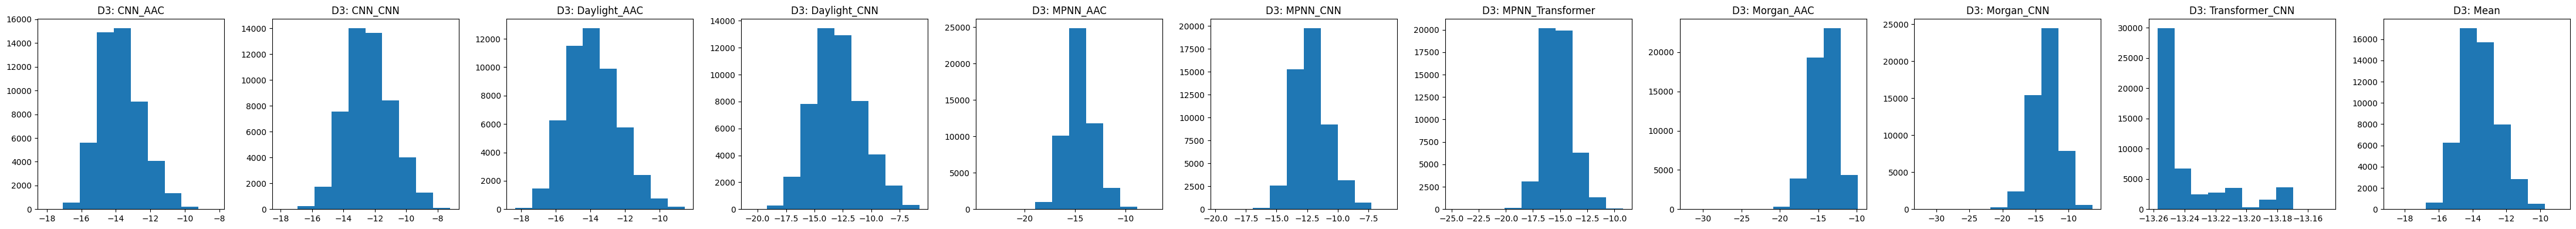

In [17]:
fig,ax = plt.subplots(1,pred_mean.shape[1]-1, figsize=(4*(pred_mean.shape[1]-1),4))

[pred_mean[x].hist(ax=ax[i], grid=False).set_title('D3: '+x) for i,x in enumerate(pred_mean.columns[1:])]
fig.tight_layout()

fig.savefig(OUTPUT_FILE3)

In [18]:
!TZ=US/Eastern date

Tue Jun 24 11:58:20 EDT 2025
